In [1]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('/home/dev/Documents/Ml_Project/Diabetes Prediction/Data/data.csv')
print(df.head())

In [5]:
df.shape

(2000, 9)

In [6]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [7]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [9]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,2000.0,3.70350,3.306063,0.000,1.000,3.000,6.000,17.00
Glucose,2000.0,121.18250,32.068636,0.000,99.000,117.000,141.000,199.00
BloodPressure,2000.0,69.14550,19.188315,0.000,63.500,72.000,80.000,122.00
SkinThickness,2000.0,20.93500,16.103243,0.000,0.000,23.000,32.000,110.00
Insulin,2000.0,80.25400,111.180534,0.000,0.000,40.000,130.000,744.00
BMI,2000.0,32.19300,8.149901,0.000,27.375,32.300,36.800,80.60
DiabetesPedigreeFunction,2000.0,0.47093,0.323553,0.078,0.244,0.376,0.624,2.42
Age,2000.0,33.09050,11.786423,21.000,24.000,29.000,40.000,81.00
Outcome,2000.0,0.34200,0.474498,0.000,0.000,0.000,1.000,1.00


In [12]:
df.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [13]:
df = df.rename(columns={'DiabetesPedigreeFunction': 'DFF'})
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DFF,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/tmp/ipykernel_167440/1656108987.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outcome', data=df, palette={'0': 'skyblue', '1': 'green'})


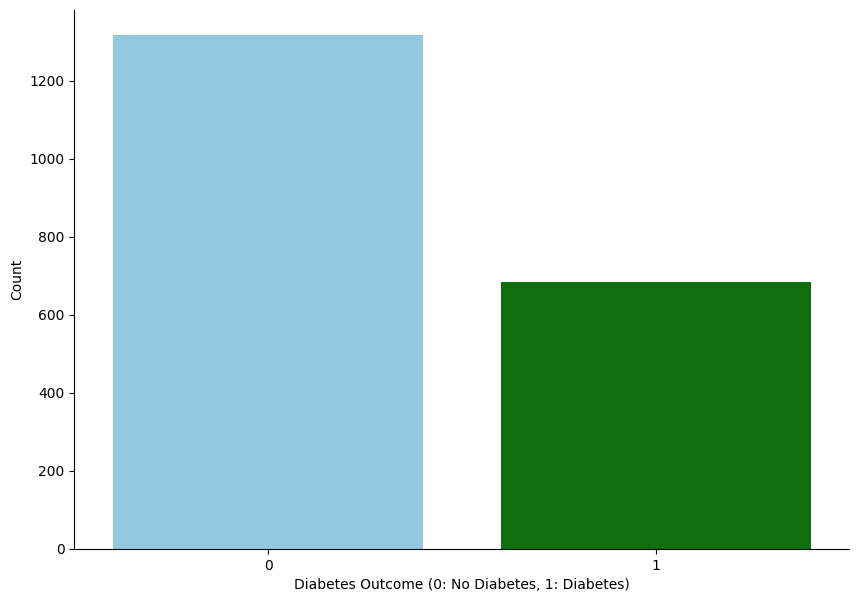

In [26]:
plt.figure(figsize=(10, 7))
sns.countplot(x='Outcome', data=df, palette={'0': 'skyblue', '1': 'green'})
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xlabel('Diabetes Outcome (0: No Diabetes, 1: Diabetes)')
plt.ylabel('Count')
plt.show()


In [27]:
df_copy = df.copy(deep=True)
df_copy[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI']] = df_copy[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI']].replace(0, np.nan)
df_copy.isnull().sum()

Pregnancies        0
Glucose           13
BloodPressure     90
SkinThickness    573
Insulin          956
BMI               28
DFF                0
Age                0
Outcome            0
dtype: int64

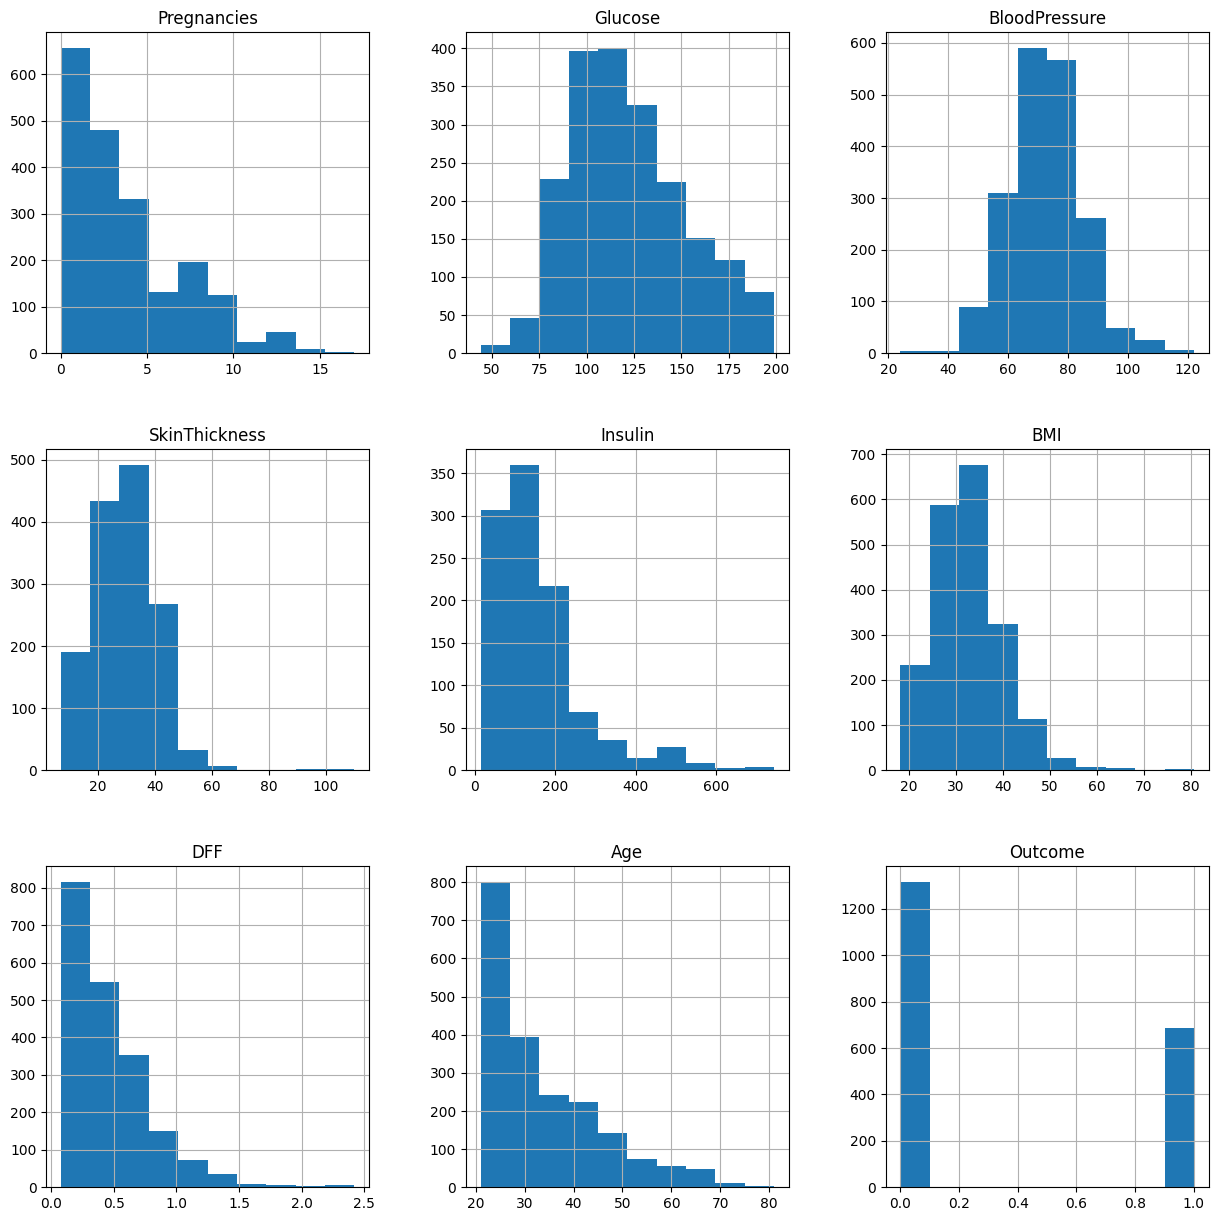

In [30]:
p = df_copy.hist(figsize=(15, 15))

In [32]:
df_copy['Glucose'].fillna(df_copy['Glucose'].mean(), inplace=True)
df_copy['BloodPressure'].fillna(df_copy['BloodPressure'].mean(), inplace=True)
df_copy['SkinThickness'].fillna(df_copy['SkinThickness'].median(), inplace=True)
df_copy['Insulin'].fillna(df_copy['Insulin'].median(), inplace=True)
df_copy['BMI'].fillna(df_copy['BMI'].median(), inplace=True)

/tmp/ipykernel_167440/3803313898.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copy['Glucose'].fillna(df_copy['Glucose'].mean(), inplace=True)
/tmp/ipykernel_167440/3803313898.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value

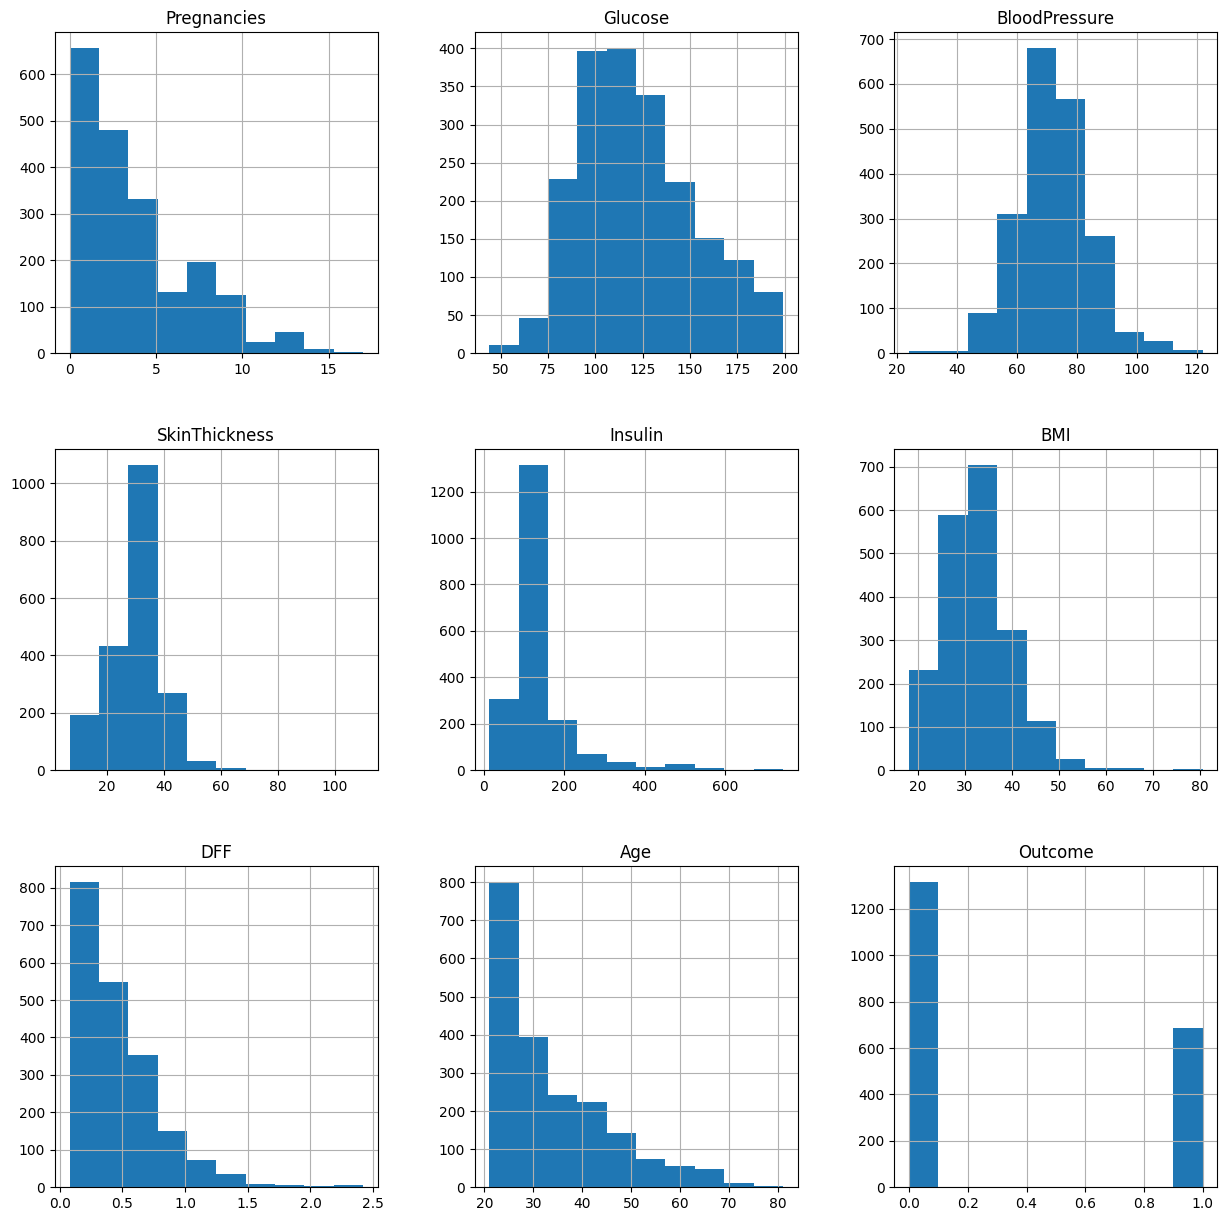

In [33]:
p = df_copy.hist(figsize=(15, 15))

In [34]:
df_copy.isnull().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
DFF              0
Age              0
Outcome          0
dtype: int64

In [38]:
from sklearn.model_selection import train_test_split
x = df_copy.drop(columns='Outcome')
y = df_copy['Outcome']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)
print('x_train size: {}, x_test size: {}'.format(x_train.shape, x_test.shape))

x_train size: (1600, 8), x_test size: (400, 8)


In [39]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [52]:
def find_best_model(X, y):
    models = {
        'logistic_regression': {
            'model': LogisticRegression(solver='lbfgs'),
            'parameters': {
                'C': [1,5,10]
               }
        },
        
        'decision_tree': {
            'model': DecisionTreeClassifier(splitter='best'),
            'parameters': {
                'criterion': ['gini', 'entropy'],
                'max_depth': [5,10]
            }
        },
        
        'random_forest': {
            'model': RandomForestClassifier(criterion='gini'),
            'parameters': {
                'n_estimators': [10,15,20,50,100,200]
            }
        },
        
        'svm': {
            'model': SVC(gamma='auto'),
            'parameters': {
                'C': [1,10,20],
                'kernel': ['rbf','linear']
            }
        }

    }
    
    scores = [] 
    cv_shuffle = ShuffleSplit(n_splits=5, test_size=0.20, random_state=0)
        
    for model_name, model_params in models.items():
        gs = GridSearchCV(model_params['model'], model_params['parameters'], cv = cv_shuffle, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': model_name,
            'best_parameters': gs.best_params_,
            'score': gs.best_score_
        })
        
    return pd.DataFrame(scores, columns=['model','best_parameters','score'])

find_best_model(x_train, y_train)

,model,best_parameters,score
0,logistic_regression,{'C': 5},0.758750
1,decision_tree,"{'criterion': 'entropy', 'max_depth': 10}",0.891250
2,random_forest,{'n_estimators': 100},0.951875
3,svm,"{'C': 20, 'kernel': 'rbf'}",0.864375


In [54]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(RandomForestClassifier(n_estimators=20, random_state= 0), x_train, y_train, cv=5)
print("Cross-validation scores for Random Forest Classifier:", scores)
print('Average Score: {}%'.format(round(sum(scores) * 100/len(scores)), 3))

Cross-validation scores for Random Forest Classifier: [0.925    0.9625   0.94375  0.9625   0.934375]
Average Score: 95%


In [55]:
classifier = RandomForestClassifier(n_estimators=20, random_state=0)
classifier.fit(x_train, y_train)

,n_estimators,20
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [60]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[269,   3],
       [  1, 127]])

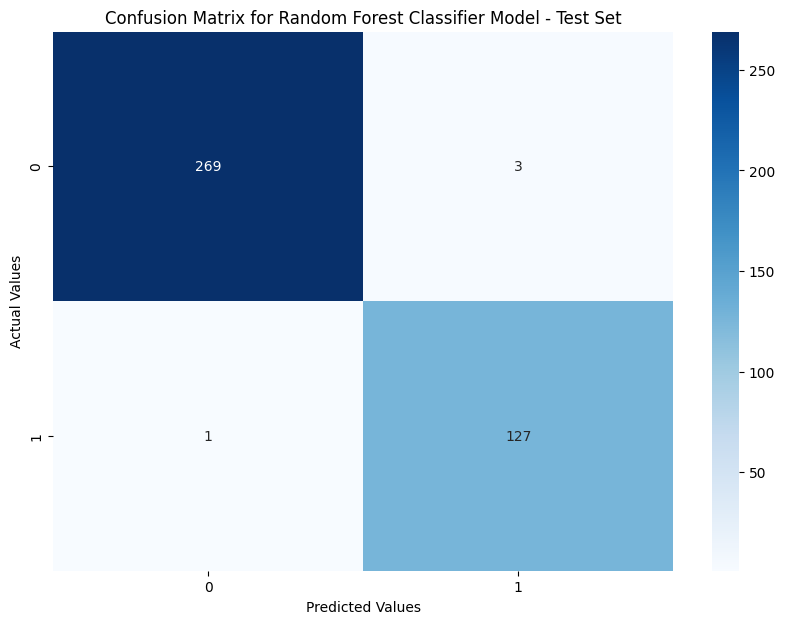

In [61]:
plt.figure(figsize=(10,7))
p = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Random Forest Classifier Model - Test Set')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [62]:
scores = round(accuracy_score(y_test, y_pred),4)* 100
print('Accuracy of Random Forest Classifier on Test Set: {}%'.format(scores))

Accuracy of Random Forest Classifier on Test Set: 99.0%


In [63]:
print(classification_report(y_test, y_pred))
print('Confusion Matrix:\n', cm)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       272
           1       0.98      0.99      0.98       128

    accuracy                           0.99       400
   macro avg       0.99      0.99      0.99       400
weighted avg       0.99      0.99      0.99       400

Confusion Matrix:
 [[269   3]
 [  1 127]]


In [64]:
y_train_pred = classifier.predict(x_train)
cm = confusion_matrix(y_train, y_train_pred)
cm

array([[1043,    1],
       [   1,  555]])

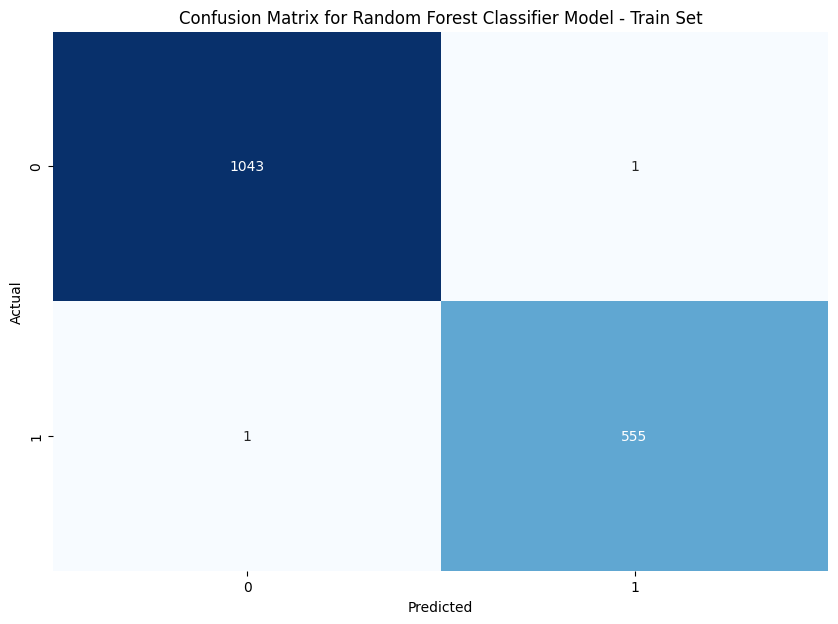

In [65]:
plt.figure(figsize=(10,7))
p = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest Classifier Model - Train Set')
plt.show()

In [66]:
scores = round(accuracy_score(y_train, y_train_pred),4)*100
print('Accuracy of Random Forest Classifier on Train Set: {}%'.format(scores))

Accuracy of Random Forest Classifier on Train Set: 99.88%


In [68]:
print(classification_report(y_train, y_train_pred))
print('Confusion Matrix:\n', cm)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1044
           1       1.00      1.00      1.00       556

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600

Confusion Matrix:
 [[1043    1]
 [   1  555]]


In [75]:
def predict_diabetes(Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DPF, Age):
    preg = int(Pregnancies)
    glu = int(Glucose)
    bp = int(BloodPressure)
    skin = int(SkinThickness)
    ins = int(Insulin)
    bmi = float(BMI)
    dpf = float(DPF)
    age = int(Age)
    
    x = [[preg, glu, bp, skin, ins, bmi, dpf, age]]
    x = sc.transform(x)
    
    return classifier.predict(x)

In [76]:
prediction = predict_diabetes(2, 120, 70, 20, 80, 30.0, 0.5, 35)
if prediction:
    print("The patient is predicted to have diabetes.")
else:
    print("The patient is predicted not to have diabetes.")

The patient is predicted not to have diabetes.


/home/dev/Documents/Ml_Project/venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [77]:
prediction = predict_diabetes(2, 120, 70, 20, 80, 30.0, 0.5, 35)
if prediction:
    print("The patient is predicted not to have diabetes.")
else:
    print("The patient is predicted to have diabetes.")

The patient is predicted to have diabetes.


/home/dev/Documents/Ml_Project/venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [79]:
prediction = predict_diabetes(2, 11, 70, 20, 80, 30.0, 0.5, 35)
if prediction:
    print("The patient is predicted to have diabetes.")
else:
    print("The patient is predicted not to have diabetes.")

The patient is predicted not to have diabetes.


/home/dev/Documents/Ml_Project/venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
